<a href="https://colab.research.google.com/github/rsrupeshsen/-Tree-Species-Classification/blob/main/treeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the initial stage of treeClassifier.

In [ ]:
!git clone https://github.com/rsrupeshsen/-Tree-Species-Classification.git

Cloning into '-Tree-Species-Classification'...


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

# Replace with exact filename shown in upload
data = pd.read_csv('TreeDataSet.csv')
print(data.head())


Saving Madhuca-longifolia.jpg to Madhuca-longifolia (25).jpg
          TreeSpecies  Ratio  Angle
0  Madhuca Longifolia   3.32     70
1  Madhuca Longifolia   3.18     75
2  Madhuca Longifolia   3.33     80
3  Madhuca Longifolia   3.40     65
4  Madhuca Longifolia   3.39     65


In [ ]:
# Adjust column names
data.columns = ['TreeSpecies', 'Ratio', 'Angle']

In [ ]:
# Check for data types in features and labels (for debugging)
print("Data types in features (X):")
print(data[[ 'Ratio', 'Angle']].dtypes)
print("Data type in labels (y):")
print(data['TreeSpecies'].dtype)

Data types in features (X):
Ratio    float64
Angle      int64
dtype: object
Data type in labels (y):
object


In [ ]:
# Prepare features and labels
# Select features excluding column names
X = data[['Ratio', 'Angle']]

In [ ]:
# Attempt to convert features to numerics (assuming numerical data)
X = X.apply(pd.to_numeric, errors='coerce').values

In [ ]:
# Encode labels into integers (assuming categorical labels)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['TreeSpecies'].values)

In [ ]:
# Check the number of unique classes after label encoding (for debugging)
print("Number of unique classes after label encoding:", len(label_encoder.classes_))

Number of unique classes after label encoding: 3


In [ ]:
# Convert labels to categorical (one-hot encoding)
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))  # Reshape for compatibility

In [ ]:
# Check the shape of the encoded labels (for debugging)
print("Shape of encoded labels (y):", y.shape)

Shape of encoded labels (y): (90, 3)


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
# Print the shape of training features (for debugging)
print("Shape of training features (X_train):", X_train.shape)

Shape of training features (X_train): (72, 2)


In [ ]:
from keras.models import Model
from keras.layers import Input, Dense

# Define the input layer with shape (2,)
input_layer = Input(shape=(2,))

# Define the layers of the model
hidden_layer1 = Dense(units=30, activation='relu')(input_layer) # First hidden layer with 30 units and ReLU activation
hidden_layer2 = Dense(units=30, activation='relu')(hidden_layer1) # Second hidden layer with 30 units and ReLU activation
output_layer = Dense(units=3, activation='softmax')(hidden_layer2) # Output layer with 5 units and softmax activation

# Define the model
custom_model = Model(inputs=input_layer, outputs=output_layer) # Creating a model with specified input and output layers

In [ ]:
# Compile the model
custom_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [ ]:
# Train the model with the reshaped input data
custom_model.fit(X_train, y_train, epochs=5, batch_size=30)

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5931 - loss: 2.7024
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6264 - loss: 0.9719
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5319 - loss: 1.2410
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6750 - loss: 1.0586
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6556 - loss: 0.8351


In [ ]:
# Make predictions on the testing set
y_pred = custom_model.predict(X_test)

# Convert one-hot encoded predictions to class labels (optional)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


In [ ]:
# Evaluate the model
test_loss, test_acc = custom_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.5556 - loss: 1.1175
Test accuracy: 0.5555555820465088



Now we get "0.3" as accuracy, so we change the optimizer as "rmsprop" and observe the change.

we start the procedure from beginning.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
data = pd.read_csv('TreeDataSet.csv')


Saving R.jpg to R (4).jpg


In [ ]:
# Adjust column names
data.columns = ['TreeSpecies', 'Ratio', 'Angle']

In [ ]:
# Check for data types in features and labels (for debugging)
print("Data types in features (X):")
print(data[[ 'Ratio', 'Angle']].dtypes)
print("Data type in labels (y):")
print(data['TreeSpecies'].dtype)

Data types in features (X):
Ratio    float64
Angle      int64
dtype: object
Data type in labels (y):
object


In [ ]:
# Prepare features and labels
# Select features excluding column names
X = data[['Ratio', 'Angle']]

In [ ]:
# Attempt to convert features to numerics (assuming numerical data)
X = X.apply(pd.to_numeric, errors='coerce').values

In [ ]:
# Encode labels into integers (assuming categorical labels)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['TreeSpecies'].values)

In [ ]:
# Check the number of unique classes after label encoding (for debugging)
print("Number of unique classes after label encoding:", len(label_encoder.classes_))

Number of unique classes after label encoding: 3


In [ ]:
# Convert labels to categorical (one-hot encoding)
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))  # Reshape for compatibility

In [ ]:
# Check the shape of the encoded labels (for debugging)
print("Shape of encoded labels (y):", y.shape)

Shape of encoded labels (y): (90, 3)


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
# Print the shape of training features (for debugging)
print("Shape of training features (X_train):", X_train.shape)

Shape of training features (X_train): (72, 2)


In [ ]:
from keras.models import Model
from keras.layers import Input, Dense

# Define the input layer with shape (2,)
input_layer = Input(shape=(2,))

# Define the layers of the model
hidden_layer1 = Dense(units=30, activation='relu')(input_layer) # First hidden layer with 30 units and ReLU activation
hidden_layer2 = Dense(units=30, activation='relu')(hidden_layer1) # Second hidden layer with 30 units and ReLU activation
output_layer = Dense(units=3, activation='softmax')(hidden_layer2) # Output layer with 5 units and softmax activation

# Define the model
custom_model = Model(inputs=input_layer, outputs=output_layer) # Creating a model with specified input and output layers

In [ ]:
# Compile the model
custom_model.compile(optimizer='rmsprop',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [ ]:
# Train the model with the reshaped input data
custom_model.fit(X_train, y_train, epochs=5, batch_size=30)

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2986 - loss: 12.0226
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2653 - loss: 7.9220 
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3403 - loss: 4.7814
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3361 - loss: 2.9404
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4278 - loss: 2.7257


In [ ]:
# Make predictions on the testing set
y_pred = custom_model.predict(X_test)

# Convert one-hot encoded predictions to class labels (optional)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


In [ ]:
# Evaluate the model
test_loss, test_acc = custom_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step - accuracy: 0.3333 - loss: 2.0135
Test accuracy: 0.3333333432674408



We get the positive result model accuracy Now it was increased as "0.6".

So we keep the optimizer as "rmsprop".

Now we change the "activation='softmax'" as "activation='sigmoid'" and observe the change.

we start the procedure from beginning.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

# Load data from CSV file
# file_path = r'C:\Users\spthe\OneDrive\Desktop\TreeDataSet.csv'  # Update with the correct file path
data = pd.read_csv('TreeDataSet.csv')

Saving Madhuca-longifolia.jpg to Madhuca-longifolia (26).jpg


In [ ]:
# Adjust column names
data.columns = ['TreeSpecies', 'Ratio', 'Angle']

In [ ]:
# Check for data types in features and labels (for debugging)
print("Data types in features (X):")
print(data[[ 'Ratio', 'Angle']].dtypes)
print("Data type in labels (y):")
print(data['TreeSpecies'].dtype)

Data types in features (X):
Ratio    float64
Angle      int64
dtype: object
Data type in labels (y):
object


In [ ]:
# Prepare features and labels
# Select features excluding column names
X = data[['Ratio', 'Angle']]

In [ ]:
# Attempt to convert features to numerics (assuming numerical data)
X = X.apply(pd.to_numeric, errors='coerce').values

In [ ]:
# Encode labels into integers (assuming categorical labels)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['TreeSpecies'].values)

In [ ]:
# Check the number of unique classes after label encoding (for debugging)
print("Number of unique classes after label encoding:", len(label_encoder.classes_))

Number of unique classes after label encoding: 3


In [ ]:
# Convert labels to categorical (one-hot encoding)
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))  # Reshape for compatibility

In [ ]:
# Check the shape of the encoded labels (for debugging)
print("Shape of encoded labels (y):", y.shape)

Shape of encoded labels (y): (90, 3)


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
# Print the shape of training features (for debugging)
print("Shape of training features (X_train):", X_train.shape)

Shape of training features (X_train): (72, 2)


In [ ]:
from keras.models import Model
from keras.layers import Input, Dense

# Define the input layer with shape (2,)
input_layer = Input(shape=(2,))

# Define the layers of the model
hidden_layer1 = Dense(units=30, activation='relu')(input_layer) # First hidden layer with 30 units and ReLU activation
hidden_layer2 = Dense(units=30, activation='relu')(hidden_layer1) # Second hidden layer with 30 units and ReLU activation
output_layer = Dense(units=3, activation='sigmoid')(hidden_layer2) # Output layer with 5 units and softmax activation

# Define the model
custom_model = Model(inputs=input_layer, outputs=output_layer) # Creating a model with specified input and output layers

In [ ]:
# Compile the model
custom_model.compile(optimizer='rmsprop',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [ ]:
# Train the model with the reshaped input data
custom_model.fit(X_train, y_train, epochs=5, batch_size=30)

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3250 - loss: 9.0247  
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3208 - loss: 4.7637
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2069 - loss: 3.0882
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2972 - loss: 2.6983 
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3153 - loss: 2.1323


In [ ]:
# Make predictions on the testing set
y_pred = custom_model.predict(X_test)

# Convert one-hot encoded predictions to class labels (optional)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


In [ ]:
# Evaluate the model
test_loss, test_acc = custom_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.3333 - loss: 1.5768
Test accuracy: 0.3333333432674408



Now we get the Negative result, the model accuracy was decreased as "0.3"

So we keep the "activation='softmax'"

we change the "hidden_layer1 = Dense(units=30" as "hidden_layer1 = Dense(units=60," and observe the changes.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

# Load data from CSV file
# file_path = r'C:\Users\spthe\OneDrive\Desktop\TreeDataSet.csv'  # Update with the correct file path
data = pd.read_csv('TreeDataSet.csv')

Saving R.jpg to R (5).jpg


In [ ]:
# Adjust column names
data.columns = ['TreeSpecies', 'Ratio', 'Angle']

In [ ]:
# Check for data types in features and labels (for debugging)
print("Data types in features (X):")
print(data[[ 'Ratio', 'Angle']].dtypes)
print("Data type in labels (y):")
print(data['TreeSpecies'].dtype)

Data types in features (X):
Ratio    float64
Angle      int64
dtype: object
Data type in labels (y):
object


In [ ]:
# Prepare features and labels
# Select features excluding column names
X = data[['Ratio', 'Angle']]

In [ ]:
# Attempt to convert features to numerics (assuming numerical data)
X = X.apply(pd.to_numeric, errors='coerce').values

In [ ]:
# Encode labels into integers (assuming categorical labels)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['TreeSpecies'].values)

In [ ]:
# Check the number of unique classes after label encoding (for debugging)
print("Number of unique classes after label encoding:", len(label_encoder.classes_))

Number of unique classes after label encoding: 3


In [ ]:
# Convert labels to categorical (one-hot encoding)
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))  # Reshape for compatibility

In [ ]:
# Check the shape of the encoded labels (for debugging)
print("Shape of encoded labels (y):", y.shape)

Shape of encoded labels (y): (90, 3)


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
# Print the shape of training features (for debugging)
print("Shape of training features (X_train):", X_train.shape)

Shape of training features (X_train): (72, 2)


In [ ]:
from keras.models import Model
from keras.layers import Input, Dense

# Define the input layer with shape (2,)
input_layer = Input(shape=(2,))

# Define the layers of the model
hidden_layer1 = Dense(units=60, activation='relu')(input_layer) # First hidden layer with 30 units and ReLU activation
hidden_layer2 = Dense(units=30, activation='relu')(hidden_layer1) # Second hidden layer with 30 units and ReLU activation
output_layer = Dense(units=3, activation='softmax')(hidden_layer2) # Output layer with 5 units and softmax activation

# Define the model
custom_model = Model(inputs=input_layer, outputs=output_layer) # Creating a model with specified input and output layers

In [ ]:
# Compile the model
custom_model.compile(optimizer='rmsprop',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [ ]:
# Train the model with the reshaped input data
custom_model.fit(X_train, y_train, epochs=5, batch_size=30)

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4278 - loss: 1.8798 
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4792 - loss: 1.2031
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5319 - loss: 0.7295
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5542 - loss: 1.1412
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5653 - loss: 1.2166 


In [ ]:
# Make predictions on the testing set
y_pred = custom_model.predict(X_test)

# Convert one-hot encoded predictions to class labels (optional)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


In [ ]:
# Evaluate the model
test_loss, test_acc = custom_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.6111 - loss: 0.7356
Test accuracy: 0.6111111044883728



Now we get the positive result but not as same because in the previous procedure accuracy was"0.66".

Now the accuracy was "0.38".

we change the "hidden_layer1 = Dense(units=60" as "hidden_layer1 = Dense(units=90," and observe the changes.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

# Load data from CSV file
# file_path = r'C:\Users\spthe\OneDrive\Desktop\TreeDataSet.csv'  # Update with the correct file path
data = pd.read_csv('TreeDataSet.csv')

Saving Madhuca-longifolia.jpg to Madhuca-longifolia (27).jpg


In [ ]:
# Adjust column names
data.columns = ['TreeSpecies', 'Ratio', 'Angle']

In [ ]:
# Check for data types in features and labels (for debugging)
print("Data types in features (X):")
print(data[[ 'Ratio', 'Angle']].dtypes)
print("Data type in labels (y):")
print(data['TreeSpecies'].dtype)

Data types in features (X):
Ratio    float64
Angle      int64
dtype: object
Data type in labels (y):
object


In [ ]:
# Prepare features and labels
# Select features excluding column names
X = data[['Ratio', 'Angle']]

In [ ]:
# Attempt to convert features to numerics (assuming numerical data)
X = X.apply(pd.to_numeric, errors='coerce').values

In [ ]:
# Encode labels into integers (assuming categorical labels)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['TreeSpecies'].values)

In [ ]:
# Check the number of unique classes after label encoding (for debugging)
print("Number of unique classes after label encoding:", len(label_encoder.classes_))

Number of unique classes after label encoding: 3


In [ ]:
# Convert labels to categorical (one-hot encoding)
OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))  # Reshape for compatibility

In [ ]:
# Check the shape of the encoded labels (for debugging)
print("Shape of encoded labels (y):", y.shape)

Shape of encoded labels (y): (90, 3)


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
# Print the shape of training features (for debugging)
print("Shape of training features (X_train):", X_train.shape)

Shape of training features (X_train): (72, 2)


In [ ]:
from keras.models import Model
from keras.layers import Input, Dense

# Define the input layer with shape (2,)
input_layer = Input(shape=(2,))

# Define the layers of the model
hidden_layer1 = Dense(units=90, activation='relu')(input_layer) # First hidden layer with 30 units and ReLU activation
hidden_layer2 = Dense(units=30, activation='relu')(hidden_layer1) # Second hidden layer with 30 units and ReLU activation
output_layer = Dense(units=3, activation='softmax')(hidden_layer2) # Output layer with 5 units and softmax activation

# Define the model
custom_model = Model(inputs=input_layer, outputs=output_layer) # Creating a model with specified input and output layers

In [ ]:
# Compile the model
custom_model.compile(optimizer='rmsprop',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [ ]:
# Train the model with the reshaped input data
custom_model.fit(X_train, y_train, epochs=5, batch_size=30)

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4000 - loss: 4.4282 
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2722 - loss: 2.8391
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5306 - loss: 1.5399
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5194 - loss: 1.0497
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3042 - loss: 1.0216


In [ ]:
# Make predictions on the testing set
y_pred = custom_model.predict(X_test)

# Convert one-hot encoded predictions to class labels (optional)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


In [ ]:
# Evaluate the model
test_loss, test_acc = custom_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 0.6111 - loss: 0.9228
Test accuracy: 0.6111111044883728



Now we get the positive result, the model accuracy was slightly increased as "0.44" so we keep the change.

Now we change the "hidden_layer2 = Dense(units=30," as "hidden_layer2 = Dense(units=15," and observe the changes.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

# Load data from CSV file
# file_path = r'C:\Users\spthe\OneDrive\Desktop\TreeDataSet.csv'  # Update with the correct file path
data = pd.read_csv('TreeDataSet.csv')

Saving R.jpg to R (6).jpg


In [ ]:
# Adjust column names
data.columns = ['TreeSpecies', 'Ratio', 'Angle']

In [ ]:
# Check for data types in features and labels (for debugging)
print("Data types in features (X):")
print(data[[ 'Ratio', 'Angle']].dtypes)
print("Data type in labels (y):")
print(data['TreeSpecies'].dtype)

Data types in features (X):
Ratio    float64
Angle      int64
dtype: object
Data type in labels (y):
object


In [ ]:
# Prepare features and labels
# Select features excluding column names
X = data[['Ratio', 'Angle']]

In [ ]:
# Attempt to convert features to numerics (assuming numerical data)
X = X.apply(pd.to_numeric, errors='coerce').values

In [ ]:
# Encode labels into integers (assuming categorical labels)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['TreeSpecies'].values)

In [ ]:
# Check the number of unique classes after label encoding (for debugging)
print("Number of unique classes after label encoding:", len(label_encoder.classes_))

Number of unique classes after label encoding: 3


In [ ]:
# Convert labels to categorical (one-hot encoding)
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))  # Reshape for compatibility

In [ ]:
# Check the shape of the encoded labels (for debugging)
print("Shape of encoded labels (y):", y.shape)

Shape of encoded labels (y): (90, 3)


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
# Print the shape of training features (for debugging)
print("Shape of training features (X_train):", X_train.shape)

Shape of training features (X_train): (72, 2)


In [ ]:
from keras.models import Model
from keras.layers import Input, Dense

# Define the input layer with shape (2,)
input_layer = Input(shape=(2,))

# Define the layers of the model
hidden_layer1 = Dense(units=90, activation='relu')(input_layer) # First hidden layer with 30 units and ReLU activation
hidden_layer2 = Dense(units=15, activation='relu')(hidden_layer1) # Second hidden layer with 30 units and ReLU activation
output_layer = Dense(units=3, activation='softmax')(hidden_layer2) # Output layer with 5 units and softmax activation

# Define the model
custom_model = Model(inputs=input_layer, outputs=output_layer) # Creating a model with specified input and output layers

In [ ]:
# Compile the model
custom_model.compile(optimizer='rmsprop',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [ ]:
# Train the model with the reshaped input data
custom_model.fit(X_train, y_train, epochs=5, batch_size=30)

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4000 - loss: 1.8674
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6056 - loss: 0.9081 
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5806 - loss: 0.8960
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6014 - loss: 0.9585
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6167 - loss: 0.8455


In [ ]:
# Make predictions on the testing set
y_pred = custom_model.predict(X_test)

# Convert one-hot encoded predictions to class labels (optional)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


In [ ]:
# Evaluate the model
test_loss, test_acc = custom_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.2222 - loss: 1.0514
Test accuracy: 0.2222222238779068



Now we get negative result, model accuracy is reduced so we keep this "hidden_layer2 = Dense(units=30," as same.

Now we change the batch size as "15" and observe the changes


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

# Load data from CSV file
# file_path = r'C:\Users\spthe\OneDrive\Desktop\TreeDataSet.csv'  # Update with the correct file path
data = pd.read_csv('TreeDataSet.csv')

Saving Madhuca-longifolia.jpg to Madhuca-longifolia (28).jpg


In [ ]:
# Adjust column names
data.columns = ['TreeSpecies', 'Ratio', 'Angle']

In [ ]:
# Check for data types in features and labels (for debugging)
print("Data types in features (X):")
print(data[[ 'Ratio', 'Angle']].dtypes)
print("Data type in labels (y):")
print(data['TreeSpecies'].dtype)

Data types in features (X):
Ratio    float64
Angle      int64
dtype: object
Data type in labels (y):
object


In [ ]:
# Prepare features and labels
# Select features excluding column names
X = data[['Ratio', 'Angle']]

In [ ]:
# Attempt to convert features to numerics (assuming numerical data)
X = X.apply(pd.to_numeric, errors='coerce').values

In [ ]:
# Encode labels into integers (assuming categorical labels)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['TreeSpecies'].values)

In [ ]:
# Check the number of unique classes after label encoding (for debugging)
print("Number of unique classes after label encoding:", len(label_encoder.classes_))

Number of unique classes after label encoding: 3


In [ ]:
# Convert labels to categorical (one-hot encoding)
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))  # Reshape for compatibility

In [ ]:
# Check the shape of the encoded labels (for debugging)
print("Shape of encoded labels (y):", y.shape)

Shape of encoded labels (y): (90, 3)


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
# Print the shape of training features (for debugging)
print("Shape of training features (X_train):", X_train.shape)

Shape of training features (X_train): (72, 2)


In [ ]:
from keras.models import Model
from keras.layers import Input, Dense

# Define the input layer with shape (2,)
input_layer = Input(shape=(2,))

# Define the layers of the model
hidden_layer1 = Dense(units=90, activation='relu')(input_layer) # First hidden layer with 30 units and ReLU activation
hidden_layer2 = Dense(units=30, activation='relu')(hidden_layer1) # Second hidden layer with 30 units and ReLU activation
output_layer = Dense(units=3, activation='softmax')(hidden_layer2) # Output layer with 5 units and softmax activation

# Define the model
custom_model = Model(inputs=input_layer, outputs=output_layer) # Creating a model with specified input and output layers

In [ ]:
# Compile the model
custom_model.compile(optimizer='rmsprop',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [ ]:
# Train the model with the reshaped input data
custom_model.fit(X_train, y_train, epochs=5, batch_size=15)

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2731 - loss: 2.1732
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4796 - loss: 1.1363
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3602 - loss: 1.0698
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4185 - loss: 1.0687
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4278 - loss: 0.9482


In [ ]:
# Make predictions on the testing set
y_pred = custom_model.predict(X_test)

# Convert one-hot encoded predictions to class labels (optional)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


In [ ]:
# Evaluate the model
test_loss, test_acc = custom_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.5000 - loss: 1.2916
Test accuracy: 0.5



Now we get the positive result model accuracy was increased but not look like same.

Now we increase the batch size as "60" and observe the changes


In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

# Load data from CSV file
# file_path = r'C:\Users\spthe\OneDrive\Desktop\TreeDataSet.csv'  # Update with the correct file path
data = pd.read_csv('TreeDataSet.csv')

Saving R.jpg to R (7).jpg


In [ ]:
import pandas as pd

data = pd.read_csv('TreeDataSet.csv')
data.head()  # optional: view the first few rows


,TreeSpecies,Ratio,Angle
0,Madhuca Longifolia,3.32,70
1,Madhuca Longifolia,3.18,75
2,Madhuca Longifolia,3.33,80
3,Madhuca Longifolia,3.40,65
4,Madhuca Longifolia,3.39,65


In [ ]:
# Adjust column names
data.columns = ['TreeSpecies', 'Ratio', 'Angle']

In [ ]:
# Check for data types in features and labels (for debugging)
print("Data types in features (X):")
print(data[[ 'Ratio', 'Angle']].dtypes)
print("Data type in labels (y):")
print(data['TreeSpecies'].dtype)

Data types in features (X):
Ratio    float64
Angle      int64
dtype: object
Data type in labels (y):
object


In [ ]:
# Prepare features and labels
# Select features excluding column names
X = data[['Ratio', 'Angle']]

In [ ]:
# Attempt to convert features to numerics (assuming numerical data)
X = X.apply(pd.to_numeric, errors='coerce').values

In [ ]:
# Encode labels into integers (assuming categorical labels)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['TreeSpecies'].values)

In [ ]:
# Check the number of unique classes after label encoding (for debugging)
print("Number of unique classes after label encoding:", len(label_encoder.classes_))

Number of unique classes after label encoding: 3


In [ ]:
# Convert labels to categorical (one-hot encoding)
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))  # Reshape for compatibility

In [ ]:
# Check the shape of the encoded labels (for debugging)
print("Shape of encoded labels (y):", y.shape)

Shape of encoded labels (y): (90, 3)


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
# Print the shape of training features (for debugging)
print("Shape of training features (X_train):", X_train.shape)

Shape of training features (X_train): (72, 2)


In [ ]:
from keras.models import Model
from keras.layers import Input, Dense

# Define the input layer with shape (2,)
input_layer = Input(shape=(2,))

# Define the layers of the model
hidden_layer1 = Dense(units=90, activation='relu')(input_layer) # First hidden layer with 30 units and ReLU activation
hidden_layer2 = Dense(units=30, activation='relu')(hidden_layer1) # Second hidden layer with 30 units and ReLU activation
output_layer = Dense(units=3, activation='softmax')(hidden_layer2) # Output layer with 5 units and softmax activation

# Define the model
custom_model = Model(inputs=input_layer, outputs=output_layer) # Creating a model with specified input and output layers

In [ ]:
# Compile the model
custom_model.compile(optimizer='rmsprop',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [ ]:
# Train the model with the reshaped input data
custom_model.fit(X_train, y_train, epochs=5, batch_size=60)

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.3259 - loss: 9.8744
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3204 - loss: 5.9480
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2981 - loss: 3.9640
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2981 - loss: 2.3181
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3093 - loss: 1.0823


In [ ]:
# Make predictions on the testing set
y_pred = custom_model.predict(X_test)

# Convert one-hot encoded predictions to class labels (optional)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


In [ ]:
# Evaluate the model
test_loss, test_acc = custom_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.3889 - loss: 0.9526
Test accuracy: 0.3888888955116272



Now we get Negative result and we get very low accuracy so we keep the batch size as 15.

Now we change the epochs as 3 and observe the changes.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

# Load data from CSV file
# file_path = r'C:\Users\spthe\OneDrive\Desktop\TreeDataSet.csv'  # Update with the correct file path
data = pd.read_csv('TreeDataSet.csv')

Saving Madhuca-longifolia.jpg to Madhuca-longifolia (29).jpg


In [ ]:
# Adjust column names
data.columns = ['TreeSpecies', 'Ratio', 'Angle']

In [ ]:
# Check for data types in features and labels (for debugging)
print("Data types in features (X):")
print(data[[ 'Ratio', 'Angle']].dtypes)
print("Data type in labels (y):")
print(data['TreeSpecies'].dtype)

Data types in features (X):
Ratio    float64
Angle      int64
dtype: object
Data type in labels (y):
object


In [ ]:
# Prepare features and labels
# Select features excluding column names
X = data[['Ratio', 'Angle']]

In [ ]:
# Attempt to convert features to numerics (assuming numerical data)
X = X.apply(pd.to_numeric, errors='coerce').values

In [ ]:
# Encode labels into integers (assuming categorical labels)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['TreeSpecies'].values)

In [ ]:
# Check the number of unique classes after label encoding (for debugging)
print("Number of unique classes after label encoding:", len(label_encoder.classes_))

Number of unique classes after label encoding: 3


In [ ]:
# Convert labels to categorical (one-hot encoding)
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))  # Reshape for compatibility

In [ ]:
# Check the shape of the encoded labels (for debugging)
print("Shape of encoded labels (y):", y.shape)

Shape of encoded labels (y): (90, 3)


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
# Print the shape of training features (for debugging)
print("Shape of training features (X_train):", X_train.shape)

Shape of training features (X_train): (72, 2)


In [ ]:
from keras.models import Model
from keras.layers import Input, Dense

# Define the input layer with shape (2,)
input_layer = Input(shape=(2,))

# Define the layers of the model
hidden_layer1 = Dense(units=90, activation='relu')(input_layer) # First hidden layer with 30 units and ReLU activation
hidden_layer2 = Dense(units=30, activation='relu')(hidden_layer1) # Second hidden layer with 30 units and ReLU activation
output_layer = Dense(units=3, activation='softmax')(hidden_layer2) # Output layer with 5 units and softmax activation

# Define the model
custom_model = Model(inputs=input_layer, outputs=output_layer) # Creating a model with specified input and output layers

In [ ]:
# Compile the model
custom_model.compile(optimizer='rmsprop',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [ ]:
# Train the model with the reshaped input data
custom_model.fit(X_train, y_train, epochs=3, batch_size=15)

Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5620 - loss: 1.4552 
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4213 - loss: 1.1021 
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5796 - loss: 0.8916 


In [ ]:
# Make predictions on the testing set
y_pred = custom_model.predict(X_test)

# Convert one-hot encoded predictions to class labels (optional)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


In [ ]:
# Evaluate the model
test_loss, test_acc = custom_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.6667 - loss: 0.8132
Test accuracy: 0.6666666865348816



Now we get the Positive result. the model accuracy was increased.

Now we change the epochs as 10 and observe the changes.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

# Load data from CSV file
# file_path = r'C:\Users\spthe\OneDrive\Desktop\TreeDataSet.csv'  # Update with the correct file path
data = pd.read_csv('TreeDataSet.csv')

Saving R.jpg to R (8).jpg


In [ ]:
# Adjust column names
data.columns = ['TreeSpecies', 'Ratio', 'Angle']

In [ ]:
# Check for data types in features and labels (for debugging)
print("Data types in features (X):")
print(data[[ 'Ratio', 'Angle']].dtypes)
print("Data type in labels (y):")
print(data['TreeSpecies'].dtype)

Data types in features (X):
Ratio    float64
Angle      int64
dtype: object
Data type in labels (y):
object


In [ ]:
# Prepare features and labels
# Select features excluding column names
X = data[['Ratio', 'Angle']]

In [ ]:
# Attempt to convert features to numerics (assuming numerical data)
X = X.apply(pd.to_numeric, errors='coerce').values

In [ ]:
# Encode labels into integers (assuming categorical labels)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['TreeSpecies'].values)

In [ ]:
# Check the number of unique classes after label encoding (for debugging)
print("Number of unique classes after label encoding:", len(label_encoder.classes_))

Number of unique classes after label encoding: 3


In [ ]:
# Convert labels to categorical (one-hot encoding)
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))  # Reshape for compatibility

In [ ]:
# Check the shape of the encoded labels (for debugging)
print("Shape of encoded labels (y):", y.shape)

Shape of encoded labels (y): (90, 3)


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
# Print the shape of training features (for debugging)
print("Shape of training features (X_train):", X_train.shape)

Shape of training features (X_train): (72, 2)


In [ ]:
from keras.models import Model
from keras.layers import Input, Dense

# Define the input layer with shape (2,)
input_layer = Input(shape=(2,))

# Define the layers of the model
hidden_layer1 = Dense(units=90, activation='relu')(input_layer) # First hidden layer with 30 units and ReLU activation
hidden_layer2 = Dense(units=30, activation='relu')(hidden_layer1) # Second hidden layer with 30 units and ReLU activation
output_layer = Dense(units=3, activation='softmax')(hidden_layer2) # Output layer with 5 units and softmax activation

# Define the model
custom_model = Model(inputs=input_layer, outputs=output_layer) # Creating a model with specified input and output layers

In [ ]:
# Compile the model
custom_model.compile(optimizer='rmsprop',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [ ]:
# Train the model with the reshaped input data
custom_model.fit(X_train, y_train, epochs=10, batch_size=15)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2796 - loss: 3.3767 
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2991 - loss: 1.9645
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3676 - loss: 1.0557
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4241 - loss: 0.9718
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5491 - loss: 1.1847
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6750 - loss: 0.8641 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5306 - loss: 1.1505
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5315 - loss: 1.4639
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6481 - loss: 0.8368
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6722 - loss: 0.9563


In [ ]:
# Make predictions on the testing set
y_pred = custom_model.predict(X_test)

# Convert one-hot encoded predictions to class labels (optional)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


In [ ]:
# Evaluate the model
test_loss, test_acc = custom_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.6667 - loss: 0.9181
Test accuracy: 0.6666666865348816



Now we get the Positive result and the model accuracy was "0.66".

From the above testings we get the Maximum test accuracy as "0.66" and Minimum test accuracy as "0.22"

Now we choose the final testing as Our model and continue our process

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
# Load data from CSV file
# file_path = r'C:\Users\spthe\OneDrive\Desktop\TreeDataSet.csv'  # Update with the correct file path
data = pd.read_csv('TreeDataSet.csv')

Saving Madhuca-longifolia.jpg to Madhuca-longifolia (30).jpg


In [ ]:
# Adjust column names
data.columns = ['TreeSpecies', 'Ratio', 'Angle']

In [ ]:
# Check for data types in features and labels (for debugging)
print("Data types in features (X):")
print(data[[ 'Ratio', 'Angle']].dtypes)
print("Data type in labels (y):")
print(data['TreeSpecies'].dtype)

Data types in features (X):
Ratio    float64
Angle      int64
dtype: object
Data type in labels (y):
object


In [ ]:
# Prepare features and labels
# Select features excluding column names
X = data[['Ratio', 'Angle']]

In [ ]:
# Attempt to convert features to numerics (assuming numerical data)
X = X.apply(pd.to_numeric, errors='coerce').values

In [ ]:
# Encode labels into integers (assuming categorical labels)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['TreeSpecies'].values)

In [ ]:
# Check the number of unique classes after label encoding (for debugging)
print("Number of unique classes after label encoding:", len(label_encoder.classes_))

Number of unique classes after label encoding: 3


In [ ]:
# Convert labels to categorical (one-hot encoding)
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))  # Reshape for compatibility

In [ ]:
# Check the shape of the encoded labels (for debugging)
print("Shape of encoded labels (y):", y.shape)

Shape of encoded labels (y): (90, 3)


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
# Print the shape of training features (for debugging)
print("Shape of training features (X_train):", X_train.shape)

Shape of training features (X_train): (72, 2)


In [ ]:
from keras.models import Model
from keras.layers import Input, Dense

# Define the input layer with shape (2,)
input_layer = Input(shape=(2,))

# Define the layers of the model
hidden_layer1 = Dense(units=90, activation='relu')(input_layer) # First hidden layer with 30 units and ReLU activation
hidden_layer2 = Dense(units=30, activation='relu')(hidden_layer1) # Second hidden layer with 30 units and ReLU activation
output_layer = Dense(units=3, activation='softmax')(hidden_layer2) # Output layer with 5 units and softmax activation

# Define the model
custom_model = Model(inputs=input_layer, outputs=output_layer) # Creating a model with specified input and output layers

In [ ]:
# Compile the model
custom_model.compile(optimizer='rmsprop',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [ ]:
# Train the model with the reshaped input data
custom_model.fit(X_train, y_train, epochs=10, batch_size=15)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3898 - loss: 1.6429 
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2269 - loss: 1.4270
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3685 - loss: 1.1775
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2954 - loss: 1.0681
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4343 - loss: 0.9912 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4500 - loss: 0.9521
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5435 - loss: 1.0469
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4907 - loss: 1.1551 
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6019 - loss: 0.8817
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5389 - loss: 0.9054


In [ ]:
# Make predictions on the testing set
y_pred = custom_model.predict(X_test)

# Convert one-hot encoded predictions to class labels (optional)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


In [ ]:
# Evaluate the model
test_loss, test_acc = custom_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.5000 - loss: 0.9164
Test accuracy: 0.5


Now we add early stopping method to our selected model


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Dense, Input
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
# Load data from CSV file
# file_path = r'C:\Users\spthe\OneDrive\Desktop\TreeDataSet.csv'  # The file path
data = pd.read_csv('TreeDataSet.csv')

Saving R.jpg to R (9).jpg


In [ ]:
# Adjust column names
data.columns = ['TreeSpecies', 'Ratio', 'Angle']

In [ ]:
# Check for data types in features and labels (for debugging)
print("Data types in features (X):")
print(data[['Ratio', 'Angle']].dtypes)
print("Data type in labels (y):")
print(data['TreeSpecies'].dtype)

Data types in features (X):
Ratio    float64
Angle      int64
dtype: object
Data type in labels (y):
object


In [ ]:
# Prepare features and labels
X = data[['Ratio', 'Angle']].apply(pd.to_numeric, errors='coerce').values

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['TreeSpecies'].values)
print("Number of unique classes after label encoding:", len(label_encoder.classes_))

Number of unique classes after label encoding: 3


In [ ]:
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))
print("Shape of encoded labels (y):", y.shape)

Shape of encoded labels (y): (90, 3)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print("Shape of training features (X_train):", X_train.shape)

Shape of training features (X_train): (72, 2)


In [ ]:
# Define the input layer with shape (2,)
input_layer = Input(shape=(2,))
hidden_layer1 = Dense(units=90, activation='relu')(input_layer)
hidden_layer2 = Dense(units=30, activation='relu')(hidden_layer1)
output_layer = Dense(units=3, activation='softmax')(hidden_layer2)

In [ ]:
# Define the model
custom_model = Model(inputs=input_layer, outputs=output_layer)
custom_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Define early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

In [ ]:
# Train the model with the callbacks
history = custom_model.fit(X_train, y_train, epochs=20, batch_size=15, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])

Epoch 1/20
1/4 ━━━━━━━━━━━━━━━━━━━━ 2s 870ms/step - accuracy: 0.2667 - loss: 8.4721
Epoch 1: val_loss improved from inf to 1.64507, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.2678 - loss: 5.8675 - val_accuracy: 0.4667 - val_loss: 1.6451
Epoch 2/20
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4667 - loss: 1.5147
Epoch 2: val_loss improved from 1.64507 to 1.14820, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4118 - loss: 1.5602 - val_accuracy: 0.4667 - val_loss: 1.1482
Epoch 3/20
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2667 - loss: 1.4050
Epoch 3: val_loss improved from 1.14820 to 1.00451, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3244 - loss: 1.1703 - val_accuracy: 0.4667 - val_loss: 1.0045
Epoch 4/20
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4667 - loss: 1.1106
Epoch 4: val_loss did not improve from 1.00451
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4281 - loss: 1.0413 - val_accuracy: 0.2000 - val_loss: 1.3768
Epoch 5/20
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.3333 - loss: 1.2791
Epoch 5: val_loss improved from 1.00451 to 0.84105, saving model to best_model.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.2815 - loss: 1.3825 - val_accuracy: 0.4667 - val_loss: 0.8410
Epoch 6/20
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.2000 - loss: 0.9611
Epoch 6: val_loss did not improve from 0.84105
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3607 - loss: 1.0033 - val_accuracy: 0.5333 - val_loss: 0.9550
Epoch 7/20
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5333 - loss: 0.8588
Epoch 7: val_loss did not improve from 0.84105
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3234 - loss: 1.1108 - val_accuracy: 0.2000 - val_loss: 0.9152
Epoch 8/20
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4667 - loss: 0.7444
Epoch 8: val_loss did not improve from 0.84105
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4532 - loss: 0.8506 - val_accuracy: 0.4000 - val_loss: 1.3665
Epoch 8: early stopping
Restoring model weights from the end of the best epoch: 5.


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = custom_model.evaluate(X_test, y_test)
print('Test loss, Test accuracy:', test_loss, test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.3333 - loss: 0.8931
Test loss, Test accuracy: 0.8930521011352539 0.3333333432674408


In [ ]:
# Make predictions on the testing set
predictions = custom_model.predict(X_test)
print('Predictions shape:', predictions.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Predictions shape: (18, 3)


In [ ]:
# Check the sum of probabilities for the first prediction
print('Sum of probabilities for the first prediction:', np.sum(predictions[0]))

Sum of probabilities for the first prediction: 1.0000001


In [ ]:
# Get the class with the highest probability for the first prediction
print('Class with the highest probability for the first prediction:', np.argmax(predictions[0]))

Class with the highest probability for the first prediction: 0


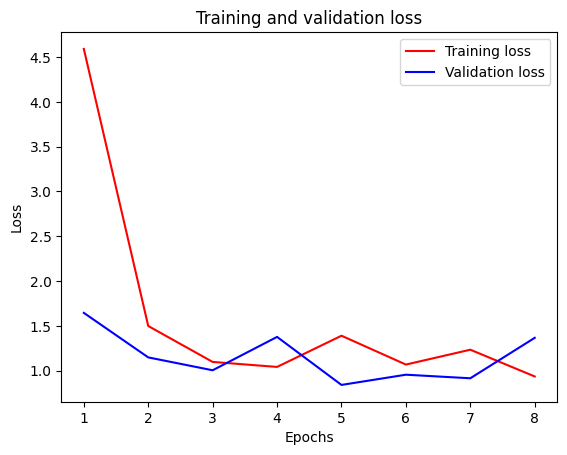

In [ ]:
# Plot training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

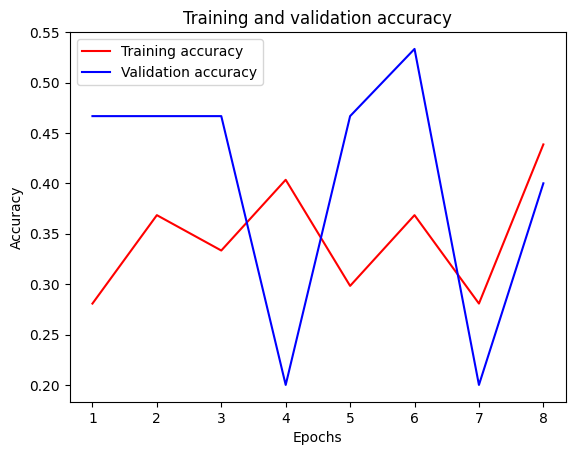

In [ ]:
# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
results = custom_model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3333 - loss: 0.8931


In [ ]:
results

[0.8930521011352539, 0.3333333432674408]

In [ ]:
predictions = custom_model.predict(X_test)
predictions.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


(18, 3)

In [ ]:
np.sum(predictions[0])

np.float32(1.0000001)

In [ ]:
np.argmax(predictions[0])

np.int64(0)

In [ ]:
from PIL import Image

# Load the image
image_path = "/content/Madhuca-longifolia (1).jpg"
img = Image.open(image_path)

# Preprocess the image to match the input shape of the model
# Assuming the model expects a 2D array of numerical features (Ratio, Angle)
# You might need to extract these features from the image.
# This is a placeholder for image feature extraction.
# Replace this with your actual image processing code to get 'Ratio' and 'Angle'.
# For example, if you are using a pre-trained model for feature extraction:
# from tensorflow.keras.applications import VGG16
# vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# img = img.resize((224, 224))
# img_array = np.expand_dims(np.array(img), axis=0)
# image_features = vgg_model.predict(img_array)
# X_new = np.array([[extracted_ratio, extracted_angle]])

# For demonstration purposes, let's assume you have a function to extract features
# from the image that returns a numpy array with shape (1, 2)
# Replace this with your actual feature extraction
def extract_features_from_image(image):
  # Placeholder: Replace with actual feature extraction logic
  # This should return a numpy array of shape (1, 2)
  return np.array([[3.2, 72]]) # Example values

X_new = extract_features_from_image(img)

# Make a prediction using the trained model
prediction = custom_model.predict(X_new)

# Convert the prediction (one-hot encoded) to a class label
predicted_class_index = np.argmax(prediction, axis=1)
predicted_class_label = label_encoder.inverse_transform(predicted_class_index)

print("Predicted tree species:", predicted_class_label[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Predicted tree species: Madhuca Longifolia
